In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    %pip install -Uqq fastai

In [2]:
!kaggle datasets download -d rajdalsaniya/pothole-detection-dataset
!kaggle datasets download -d faizalkarim/cleandirty-road-classification

Dataset URL: https://www.kaggle.com/datasets/rajdalsaniya/pothole-detection-dataset
License(s): CC0-1.0
 93%|██████████████████████████████████████▎  | 220M/235M [00:01<00:00, 262MB/s]
100%|█████████████████████████████████████████| 235M/235M [00:01<00:00, 230MB/s]
Dataset URL: https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification
License(s): CC0-1.0
 63%|████████████████████████▌              | 45.0M/71.6M [00:00<00:00, 153MB/s]
100%|███████████████████████████████████████| 71.6M/71.6M [00:00<00:00, 171MB/s]


In [3]:
from fastcore.all import *
from fastai.vision.all import *
from zipfile import ZipFile
from pathlib import Path
import os.path

In [4]:
datasets = Path("/kaggle/working/data")
pothole_path = Path(datasets/"potholes")
road_path =  Path(datasets/"roads")

In [5]:
with ZipFile("pothole-detection-dataset.zip", "r") as compressed:
    compressed.extractall(pothole_path)
with ZipFile("cleandirty-road-classification.zip", "r") as compressed:
    compressed.extractall(road_path)

In [6]:
def label_func(f):
    comp = f.parts
    return comp[4]

In [8]:
roads = DataBlock(
blocks = (ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct = 0.2, seed= 50),
get_y = label_func,
item_tfms = Resize(460),
batch_tfms = aug_transforms(size = 224, min_scale = 0.75)
)

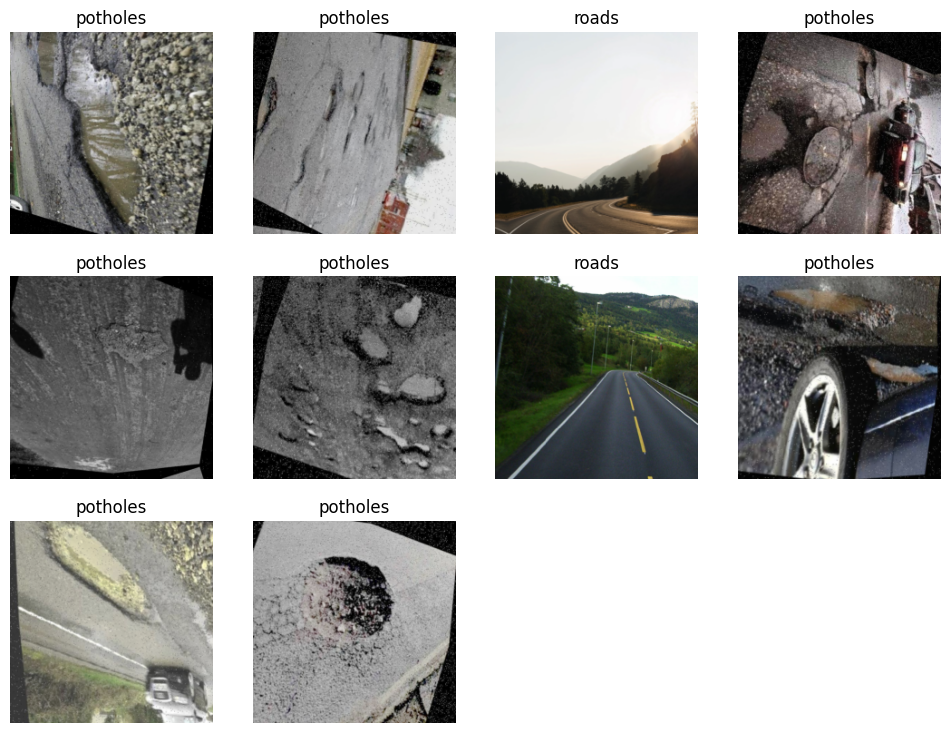

In [9]:
dls = roads.dataloaders(datasets)
dls.show_batch(max_n=10)

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 195MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.820594,0.297872,0.105603,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.236257,0.252668,0.053879,00:15
1,0.136027,0.034591,0.010776,00:16
2,0.070760,0.006844,0.000000,00:15
3,0.044117,0.003912,0.000000,00:16


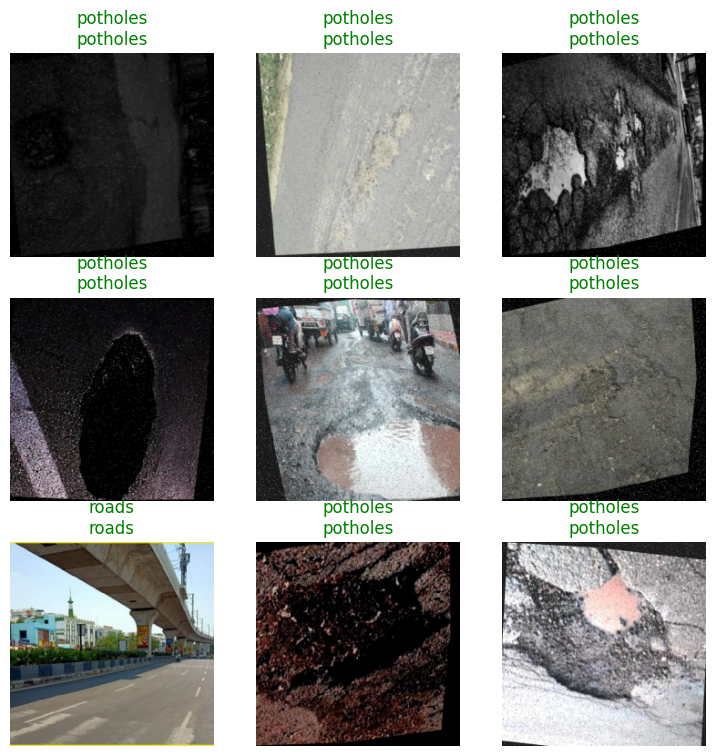

In [11]:
learn.show_results()

# **Testing with external data**

In [ ]:
# from fastdownload import download_url
# from fastai.vision.all import *
# from bs4 import BeautifulSoup
# from time import sleep
# import requests


# dest_dir = Path("kaggle/working/test")

# images = []
# def get_images(term):
#     url = f'https://duckduckgo.com/?t=h_&q={term}&iax=images&ia=images'
#     reqs = requests.get(url)
#     soup = BeautifulSoup(reqs.text, 'html.parser')
#     images.extend(soup.findAll('img')[:20])

# term = "clean road"
# test_urls = get_images(term)
# sleep(10)
# term = "pothole"
# test_urls = get_images(term)
